# pandas

Пакет для статистической обработки данных, по функциональности близкий к R.

In [ ]:
import numpy as np
import pandas as pd

## Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan` (в этот день термометр сломался или метеоролог был пьян); они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

In [2]:
l=[1,3,5,np.nan,6,8]
s=pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [3]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

Обычная индексация.

In [4]:
s[2]

5.0

In [5]:
s[2]=7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [7]:
s1=s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [8]:
s2=s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64

В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [9]:
s1+s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64

К наборам данных можно применять функции из `numpy`.

In [10]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных `s` мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [11]:
s.index

RangeIndex(start=0, stop=6, step=1)

Но можно создавать наборы данных с индексом, заданным списком.

In [12]:
i=list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [13]:
s=pd.Series(l,index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [14]:
s['c']

5.0

Если индекс - строка, то вместо `s['c']` можно писать `s.c`.

In [15]:
s.c

5.0

Набор данных можно создать из словаря.

In [16]:
s=pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64

Можно отсортировать набор данных.

In [17]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [18]:
d=pd.date_range('20160101',periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
s=pd.Series(np.random.normal(size=10),index=d)
s

2016-01-01   -0.487463
2016-01-02    0.276310
2016-01-03   -0.594426
2016-01-04    1.110397
2016-01-05    1.286529
2016-01-06   -0.470874
2016-01-07   -0.211480
2016-01-08   -1.875882
2016-01-09    0.251667
2016-01-10   -0.379804
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [20]:
s>0

2016-01-01    False
2016-01-02     True
2016-01-03    False
2016-01-04     True
2016-01-05     True
2016-01-06    False
2016-01-07    False
2016-01-08    False
2016-01-09     True
2016-01-10    False
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть `True`.

In [21]:
s[s>0]

2016-01-02    0.276310
2016-01-04    1.110397
2016-01-05    1.286529
2016-01-09    0.251667
dtype: float64

Кумулятивные максимумы - от первого элемента до текущего.

In [22]:
s.cummax()

2016-01-01   -0.487463
2016-01-02    0.276310
2016-01-03    0.276310
2016-01-04    1.110397
2016-01-05    1.286529
2016-01-06    1.286529
2016-01-07    1.286529
2016-01-08    1.286529
2016-01-09    1.286529
2016-01-10    1.286529
Freq: D, dtype: float64

Кумулятивные суммы.

In [23]:
s=s.cumsum()
s

2016-01-01   -0.487463
2016-01-02   -0.211153
2016-01-03   -0.805579
2016-01-04    0.304818
2016-01-05    1.591347
2016-01-06    1.120472
2016-01-07    0.908993
2016-01-08   -0.966889
2016-01-09   -0.715222
2016-01-10   -1.095026
Freq: D, dtype: float64

Построим график.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

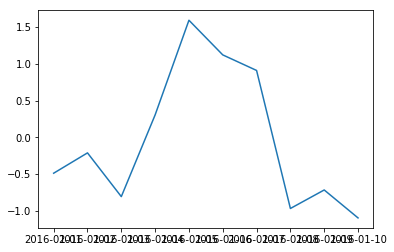

In [25]:
plt.plot(s)

## DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [26]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [27]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [28]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [29]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [30]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [31]:
df['one']['c']

3.0

Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [32]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4


Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [33]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3


Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - столбца.

In [34]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [35]:
df.loc['b','one']

2.0

In [36]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [37]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [38]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [39]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


И удалять имеющиеся.

In [40]:
del df['two']
df['foo']=0.
df

,one,three,flag,foo
a,1.0,1.0,False,0.0
b,2.0,4.0,False,0.0
c,3.0,9.0,True,0.0
d,NaN,NaN,True,0.0


Добавим копию столбца `one`, в которую входят только строки до второй.

In [41]:
df['one_tr']=df['one'][:2]
df

,one,three,flag,foo,one_tr
a,1.0,1.0,False,0.0,1.0
b,2.0,4.0,False,0.0,2.0
c,3.0,9.0,True,0.0,NaN
d,NaN,NaN,True,0.0,NaN


In [42]:
df=df.loc[:,['one','one_tr']]
df

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [43]:
df2=pd.DataFrame({'one':{'e':0,'f':1},'one_tr':{'e':2}})
df2

,one,one_tr
e,0,2.0
f,1,NaN


In [44]:
pd.concat([df,df2])

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN
e,0.0,2.0
f,1.0,NaN


In [45]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,three,two
a,NaN,0.0
b,NaN,1.0
c,2.0,NaN
d,3.0,NaN


In [46]:
pd.concat([df,df2],axis=1)

,one,one_tr,three,two
a,1.0,1.0,NaN,0.0
b,2.0,2.0,NaN,1.0
c,3.0,NaN,2.0,NaN
d,NaN,NaN,3.0,NaN


Создадим таблицу из массива случайных чисел.

In [47]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,0.348744,-0.720072,1.048774,-0.075836
1,0.199086,-0.286631,0.058238,-0.151658
2,0.499135,-0.294143,-0.163828,0.375041
3,-0.402582,0.561931,-0.657397,2.332865
4,1.687783,-2.263953,-1.340542,-0.633087
5,0.832071,-0.344207,-0.480403,1.486484
6,0.032021,0.099105,0.884451,0.077913
7,-1.177046,-0.419837,1.678834,-0.346525
8,1.197906,0.433366,0.346581,2.729147
9,-1.434108,0.327975,0.501700,1.226088


In [48]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,-0.880889,-0.789365,1.958547,NaN
1,-0.488779,0.043262,-1.095644,NaN
2,-0.168042,-0.683582,-0.284726,NaN
3,-0.443783,0.621851,1.182435,NaN
4,1.825779,-1.680600,-0.261715,NaN
5,1.944790,-0.196065,0.700965,NaN
6,0.007479,-0.756897,1.284338,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [49]:
2*df+3

,A,B,C,D
0,3.697487,1.559855,5.097549,2.848328
1,3.398171,2.426738,3.116475,2.696684
2,3.998269,2.411714,2.672343,3.750081
3,2.194835,4.123862,1.685205,7.665730
4,6.375566,-1.527906,0.318916,1.733826
5,4.664143,2.311586,2.039194,5.972969
6,3.064042,3.198210,4.768902,3.155826
7,0.645908,2.160327,6.357668,2.306950
8,5.395813,3.866731,3.693161,8.458295
9,0.131784,3.655950,4.003401,5.452177


In [50]:
np.sin(df)

,A,B,C,D
0,0.341717,-0.659439,0.866813,-0.075763
1,0.197773,-0.282722,0.058205,-0.151077
2,0.478666,-0.289920,-0.163096,0.366310
3,-0.391796,0.532821,-0.611059,0.723409
4,0.993165,-0.769233,-0.973608,-0.591637
5,0.739328,-0.337450,-0.462137,0.996448
6,0.032016,0.098943,0.773567,0.077834
7,-0.923477,-0.407611,0.994170,-0.339632
8,0.931278,0.419928,0.339684,0.400851
9,-0.990673,0.322127,0.480917,0.941174


In [51]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.178301,-0.290647,0.187641,0.702043
std,0.981700,0.808539,0.895088,1.172421
min,-1.434108,-2.263953,-1.340542,-0.633087
25%,-0.293931,-0.400929,-0.401259,-0.132702
50%,0.273915,-0.290387,0.202409,0.226477
75%,0.748837,0.270758,0.788763,1.421385
max,1.687783,0.561931,1.678834,2.729147


In [52]:
df.sort_values(by='B')

,A,B,C,D
4,1.687783,-2.263953,-1.340542,-0.633087
0,0.348744,-0.720072,1.048774,-0.075836
7,-1.177046,-0.419837,1.678834,-0.346525
5,0.832071,-0.344207,-0.480403,1.486484
2,0.499135,-0.294143,-0.163828,0.375041
1,0.199086,-0.286631,0.058238,-0.151658
6,0.032021,0.099105,0.884451,0.077913
9,-1.434108,0.327975,0.501700,1.226088
8,1.197906,0.433366,0.346581,2.729147
3,-0.402582,0.561931,-0.657397,2.332865


Атрибут `iloc` подобен `loc`: первый индекс - номер строки, второй - номер столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [53]:
df.iloc[2]

A    0.499135
B   -0.294143
C   -0.163828
D    0.375041
Name: 2, dtype: float64

In [54]:
df.iloc[1:3]

,A,B,C,D
1,0.199086,-0.286631,0.058238,-0.151658
2,0.499135,-0.294143,-0.163828,0.375041


In [55]:
df.iloc[1:3,0:2]

,A,B
1,0.199086,-0.286631
2,0.499135,-0.294143


Построим графики кумулятивных сумм - мировые линии четырёх пьяных, у которых величина каждого шага - гауссова случайная величина.

In [56]:
cs=df.cumsum()
cs

,A,B,C,D
0,0.348744,-0.720072,1.048774,-0.075836
1,0.547829,-1.006703,1.107012,-0.227494
2,1.046964,-1.300846,0.943184,0.147547
3,0.644381,-0.738915,0.285786,2.480412
4,2.332165,-3.002869,-1.054756,1.847325
5,3.164236,-3.347076,-1.535159,3.333809
6,3.196257,-3.247970,-0.650708,3.411722
7,2.019211,-3.667807,1.028126,3.065197
8,3.217117,-3.234442,1.374707,5.794344
9,1.783009,-2.906466,1.876407,7.020433


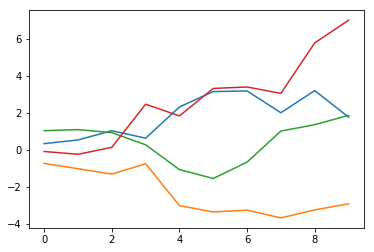

In [57]:
plt.plot(cs)